In [ ]:
import random
import itertools
import numpy as np
from scipy.optimize import minimize_scalar,minimize
import matplotlib.pyplot as plt

# Line search methods for unconstrained nonlinear optimization and Molecular Distance Geometry Problem

Consider the conjugate direction methods with the Fletcher-Reeves (FR) and Polak-Ribiere (PR) updates and the quasi-Newton Davidon-Fletcher-Powell (DFP) method.



Let $\varepsilon>0$ be the given tolerance value. As a stopping criterion, use the condition $||\nabla f\left (\underline{x}_k\right )||_2<\varepsilon$, where $\nabla f\left (\underline{x}_k\right )$ is the gradient of the function $f$ computed in $\underline{x}_k$.



1.   Implement the conjugate direction method with the Fletcher-Reeves (FR) and Polak-Ribiere (PR) updates.
2.   Homework: implement the quasi-Newton DFP method and compare it to the other methods on the Rosenbrock function.



**Implementation sketch**

Stub of a generic descent method. Find a local minimum $\mathbf{x}^*$ (with value $f(\mathbf{x})^*$) of the function $f$
   starting from an initial point $\mathbf{x}_0$, given a tolerance $\varepsilon>0$ and an iteration limit. Return the number of iterations
   (**counter**) and the norm of the gradient $||\nabla f(\mathbf{x}^*)||_2$ in the last solution (**error**). The variables **xks** and **fks**
   contain the list of solutions found at each iteration and their corresponding objective function values (useful to represent graphically the results).

In [ ]:
def descentmethod(f, x0, epsilon, maxiterations):
    xks = [x0]
    fks = [f(x0)]
    xk = x0
    counter = 0
    error = np.inf

    while error > epsilon and counter < maxiterations:
        counter += 1
        gradf = grad_finite(f, xk)
        d =

        res = minimize(lambda a: f(xk + a*d), 0, method='nelder-mead').x[0]
        alpha = res.x

        xk = xk + alpha*d
        error = np.linalg.norm(grad_finite(f, xk))
        fk = f(xk)

        xks.append(xk)
        fks.append(fk)

    return xk, fk, counter, error, np.array(xks), np.array(fks)

Numerical estimation of the gradient $\nabla f(\mathbf{x})$ of $f$ in the point $\mathbf{x}$:

In [ ]:
# Finite difference approximation of the derivatives of a scalar or vector-valued function.
# Possible alternatives are: SCIPY scipy.optimize.approx_fprime ; JAX command grad
def grad_finite(f, x,tol=1e-4):

    n = len(x)
    gradf = np.zeros(n)

    for i in range(n):
        delta = np.zeros(n)
        delta[i] = tol
        gradf[i] = (f(x+delta) - f(x)) / tol

    return gradf

Numerical estimation of the Hessian $\nabla^2 f(\mathbf{x})$ of $f$ in $\mathbf{x}$:

In [ ]:
# Finite difference approximation of the heassian of a scalar or vector-valued function.
def hes_finite(f, x,tol=1e-4):

    n = len(x)
    H = np.zeros((n,n))

    for i in range(n):
        delta_i = np.zeros(n)
        delta_i[i] = tol
        for j in range(n):
            delta_j = np.zeros(n)
            delta_j[j] = tol
            H[i,j] = (f(x+delta_i+delta_j) - f(x+delta_i) - f(x+delta_j) + f(x)) / (tol**2)

    return H

**Exercise 1: Rosenbrock function**

Consider the following Rosenbrock function
\begin{equation*}
  f(\mathbf{x}) = 100(x_2-x_1^2)^2 + (1-x_1)^2.
\end{equation*}
It is a quadratic function, nonconvex, often used to test the convergence of nonlinear optimization algorithms.

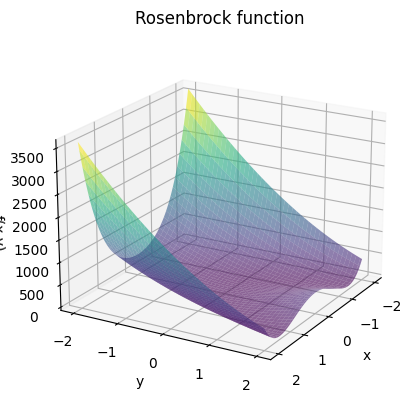

In [ ]:
def f_rosenbrock(x):
  return 100*(x[1]-x[0]**2)**2+(1-x[0])**2

# Create a meshgrid over the domain of interest
x = np.arange(-2, 2.01, 0.01)
y = np.arange(-2, 2.01, 0.01)
X, Y = np.meshgrid(x, y)

# Compute the function values at each point in the meshgrid
Z = np.zeros_like(X)
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        Z[i,j] = f_rosenbrock([X[i,j], Y[i,j]])

# Plot the function surface
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_surface(X, Y, Z,cmap='viridis', edgecolor='none',alpha=0.6)


# Set lighting and perspective
ax.view_init(30, 240)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x,y)')
ax.set_title('Rosenbrock function')
ax.view_init(20, 30)
plt.show()

1.   Find analytically the only global optimum.
2.   Observe the behavior of the gradient method, starting from the initial points: $\vec{x}_0'=(-2,2)$, $\vec{x}_0''=(0,0)$ and $\vec{x}_0'''=(-1,0)$, using a maximum number of $50$, $500$ and $1000$ iterations.
3. Compare the sequence of solutions found by the line search methods.

**Exercise 1: Molecular Distance Geometry Problem**

The *Molecular Distance Geometry Problem*, or MDGP, consists in reconstructing the 3-D structure  of a molecule from information on the distances between its atoms.
Let us assume that the distances between all pairs of atoms are known (with infinite precision).
Let $D \in \mathbb{R}^{m \times m}$ the symmetrix matrix of the Euclidean distances $d_{ij}$ for each pair $\{i,j\}$. A reference is:J.M.Yoon, Y.Gad, Z.Wu,  *Mathematical modeling of protein
  structure using distance geometry*, Technical report TR00-24, DCAM,
Rice University, Houston, 2000, available from: http://www.caam.rice.edu/caam/trs/tr00.html\#TR00-24 .



Let $ \mathbf{x}^1,\ldots, \mathbf{x}^m \in \mathbb{R}^3$ the unknown positions of the atoms. We can assume w.l.o.g. that the $m$-th point has coordinates $\mathbf{x}^m=(0,0,0)$. The problem consists of determining the coordinates $\mathbf{x}^1,\ldots, \mathbf{x}^{m-1} \in \mathbb{R}^3$ of the other $m-1$ atoms so to satisfy the distances $d_{ij}$ between the pairs of atoms $i$ and $j$. The corresponding constraints are:
\begin{eqnarray*}
||\mathbf{x}^i-\mathbf{x}^j||_2 = d_{ij},& i,j=0,1,\ldots,m.
\end{eqnarray*}


1.  Give a nonlinear unconstrained optimization formulation for the problem.


2.  Due to the non-convexity of the problem, implement a multistart method based on the methods implemented in the previous lab. Let:

   *   $\varepsilon > 0$ the tolerance of the multistart algorithm
   *   $\bar{f}$ the known optimal value of the objective function
   *   $M$ the maximum number of multistart iterations

     The multistart algorithm is as follows:

     1.   Let $\mathbf{x}$ be a point in $\mathbb{R}^{3\left ( m-1 \right )}$. Let $\mathbf{x}^\ast\leftarrow\mathbf{x}$.
     2.   If $f(\mathbf{x}^\ast) < \bar{f} + \varepsilon$ or if more than $M$ iterations, the algorithm stops; otherwise, go to step 3).
     3. Find local minimum $\mathbf{x}'=(x^1,\ldots,x^{m-1})$ from initial point $\mathbf{x}$, with a nonlinear optimization method (with a tolerance $\varepsilon' >0$ and a maximum number of iterations $M'$).
     4. If $f(\mathbf{x}')<f(\mathbf{x}^*)$ update $\mathbf{x}^\ast\leftarrow \mathbf{x}'$.
     5. Find new initial point $\mathbf{x}\in\mathbb{R}^{3\left ( m-1 \right )}$, randomly.
     6. Go to step 2.





2. Since in the optimal solution of problem (4) all the constraints (3) are satisfied (by the hypothesis on the data), the value of the objective function in the optimal solution amounts to $\bar{f}=0$. Therefore it is possible to stop the algorithm when the error between the current solution and the optimal one falls below a prefixed constant  $\varepsilon> 0$.

Multistart method: Find an approximate solution $\mathbf{x}^\ast$ with value $f(\mathbf{x}^\ast)$, given:

* an objective function to be optimized *f*
* the number of components of the solution *n*
* a global sub-optimality tolerance *eps*
* a local sub-optimality tolerance *localeps*
* a limit on the maximum number of multistart iterations *maxit*
*  a limit on the maximum number of iterations of the local nonlinear optimization method *maxlocalit*
* the local nonlinear optimization method *myLocalOptimAlg*




3. Apply the algorithm to the following instance with $m=4$ atoms ($d_{ii} = 0$ for any $i$):

| $d_{ij}$ | 2 | 3 | 4|
| --- | --- | --- | --- |
| 1 | 1.526 | 2.491389536 | 3.837572036 |
| 2 | 0 | 1.526 | 2.491389535 |
| 3 | - | 0 | 1.526 |

In [ ]:
def f_mdgp(x):
    f = (-2.32868 + (x[0]-x[3])**2 + (x[1]-x[4])**2 + (x[2]-x[5])**2)**2 + \
        (-6.20702 + (x[0]-x[6])**2 + (x[1]-x[7])**2 + (x[2]-x[8])**2)**2 + \
        (-14.727 + (x[0]-0)**2 + (x[1]-0)**2 + (x[2]-0)**2)**2 + \
        (-2.32868 + (x[3]-x[6])**2 + (x[4]-x[7])**2 + (x[5]-x[8])**2)**2 + \
        (-6.20702 + (x[3]-0)**2 + (x[4]-0)**2 + (x[5]-0)**2)**2 + \
        (-2.32868 + (x[6]-0)**2 + (x[7]-0)**2 + (x[8]-0)**2)**2
    return f

4. Apply the Gauss-Newton Method for the solution of nonlinear least square problems. We provide the  jac function that computes the Jacobian at x of a vector function r with m components.
The second parameter represents the number of components.

In [ ]:
def jac(f, m, x,tol=1e-4):
    n = len(x)
    J = np.zeros((m,n))

    for i in range(m):
        for j in range(n):
            delta = np.zeros(n)
            delta[j] = tol
            rd = f(x+delta)
            rx = f(x)
            J[i,j] = (rd[i] - rx[i]) / tol
    return J

**Gauss-Newton method**

It is a variant of Newton method for nonlinear least squares problem. Consider:
\begin{align}
f(\mathbf{x})=\sum_{i=1}^m(r_i(\mathbf{x}))^2, & & (1)
\end{align}
where $\mathbf{x} \in R^n$ and $r(\mathbf{x})=(r_1(\mathbf{x}),\ldots,r_m(\mathbf{x}))^T$ is the vector of residuals. Assume $r_i(\mathbf{x})$ are nonlinear.


Differentiating (1) we obtain
\begin{align}
\nabla_{\mathbf{x}} f(\mathbf{x})=\sum_{i=1}^m2 r_i(\mathbf{x})\nabla_{\mathbf{x}} r_i(\mathbf{x}).
\end{align}

Let ${\bf J}_{\mathbf{x}} \mathbf{r}(\mathbf{x})=\left\{ \frac{\partial r_i}{\partial
x_k}\right\}_{ik}$ the Jacobian of $\mathbf{r}$ at $\mathbf{x}$: we indicate ${\bf J}_{\mathbf{x}} \mathbf{r}(\mathbf{x})$ with ${\bf J}\left (\mathbf{x}\right )$. Observe ${\bf J}\left (\mathbf{x}\right ) =
\left( \begin{array}{c}
       \nabla_{\mathbf{x}}^T r_1(\mathbf{x})\\
       \vdots\\
       \nabla_{\mathbf{x}}^T r_m(\mathbf{x})
       \end{array}
\right)$.
We can write the expression as:
\begin{align}
\nabla f(\mathbf{x})=2 {\bf J}_{\mathbf{x}}\mathbf{r}(\mathbf{x})^T \mathbf{r}(\mathbf{x}).
\end{align}

The Hessian of $f$ at $\mathbf{x}$, that we indicate with ${\bf H} \left ( \mathbf{x}\right )$, is
\begin{align}
{\bf H} \left ( \mathbf{x}\right )=2{{\bf J}\left (\mathbf{x}\right )}^T{\bf J}\left (\mathbf{x}\right )+2\sum_{i=1}^m(r_i(\mathbf{x}))\nabla^2
r_i(\mathbf{x}). & & (2)
\end{align}
If the residuals are small, we can discard the last term in
(2), leading to
\begin{align}
{\bf H} \left ( \mathbf{x}\right )\approx 2
{{\bf J}\left (\mathbf{x}\right )}^T{\bf J}\left (\mathbf{x}\right ).
\end{align}

Observe that, if the residuals are linear in $\mathbf{x}$, then $\nabla^2 r_i(\mathbf{x})= 0$ for any $i$, so the second-order approximation is exact and the method is the same as the one for linear least squares.

The Netwon method step:
\begin{align}
  \mathbf{x}_{k+1}=
\mathbf{x}_k-{\left [{\bf H} \left ( \mathbf{x}_k\right )\right ]}^{-1}\nabla f(\mathbf{x}_k)
\end{align}
corresponds, using approximation  of the Hessian to the first derivative, to:
\begin{align}
\mathbf{x}_{k+1}=\mathbf{x}_k- \left [{{\bf J}\left (\mathbf{x}_k\right )}^T{\bf J}\left (\mathbf{x}_k\right )\right ]^{-1}{{\bf J}\left (\mathbf{x}_k\right )}^T \mathbf{r}(\mathbf{x}_k).
\end{align}

For the convergence of Gauss-Newton, the inital solution must be sufficiently close to a stationary point of $f$ and the discarded terms (2) must be small. Observe that the method does not need to compute the Hessian ${\textbf{H}}\left (\mathbf{x}\right )$, that would imply computing the Hessian $\nabla^2r_i$ for each $r_i$.

4. Observe that, to implemtent the Gauss-Newton method, we must provide the residuals vector $\mathbf{r}$, implemented here in function r_mdgp:

In [ ]:
def r_mdgp(x):
    r = np.zeros(6)
    r[0] = -2.32868 + (x[0]-x[3])**2 + (x[1]-x[4])**2 + (x[2]-x[5])**2
    r[1] = -6.20702 + (x[0]-x[6])**2 + (x[1]-x[7])**2 + (x[2]-x[8])**2
    r[2] = -14.727 + (x[0]-0)**2 + (x[1]-0)**2 + (x[2]-0)**2
    r[3] = -2.32868 + (x[3]-x[6])**2 + (x[4]-x[7])**2 + (x[5]-x[8])**2
    r[4] = -6.20702 + (x[3]-0)**2 + (x[4]-0)**2 + (x[5]-0)**2
    r[5] = -2.32868 + (x[6]-0)**2 + (x[7]-0)**2 + (x[8]-0)**2
    return r